## Problem Statement
With the given 9 features(categorical and continuous) build a model to predict the price of houses in Bengaluru.

## Data :
The train and test data will consist of various features that describe that property in Bengaluru. 
This is an actual data set that is curated over months of primary & secondary research by our team. 
Each row contains fixed size object of features. 
There are 9 features and each feature can be accessed by its name.

## Features

1. Area_type – describes the area
2. Availability – when it can be possessed or when it is ready(categorical and time-series)
3. Location – where it is located in Bengaluru
4. Price – Value of the property in lakhs(INR)
5. Size – in BHK or Bedroom (1-10 or more)
6. Society – to which society it belongs
7. Total_sqft – size of the property in sq.ft
8. Bath – No. of bathrooms
9. Balcony – No. of the balcony

In [1]:
import pandas as pd
import numpy as np
import time

# Visualization
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

from sklearn import preprocessing
import category_encoders as ce

from sklearn.model_selection import train_test_split

from sklearn.grid_search import GridSearchCV


from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import os


/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
raw_data=pd.read_csv("Predicting-House-Prices-In-Bengaluru-Train-Data.csv")

In [4]:
print(raw_data.columns)

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


In [5]:
print ('The train data has {0} rows and {1} columns'.format(raw_data.shape[0],raw_data.shape[1]))

The train data has 13320 rows and 9 columns


In [6]:
raw_data_test=pd.read_csv("Predicting-House-Prices-In-Bengaluru-Test-Data.csv")

In [7]:
print(raw_data_test.columns)

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


In [8]:
print ('The train data has {0} rows and {1} columns'.format(raw_data_test.shape[0],raw_data_test.shape[1]))

The train data has 1480 rows and 9 columns


In [9]:
raw_data_test.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


### Analysis of missing values
https://github.com/ResidentMario/missingno
https://dev.to/tomoyukiaota/visualizing-the-patterns-of-missing-value-occurrence-with-python-46dj
https://github.com/ResidentMario/missingno

In [10]:
# find the column nams where data is missing
raw_data.columns[raw_data.isnull().any()]

Index(['location', 'size', 'society', 'bath', 'balcony'], dtype='object')

In [11]:
print ('The data is missing in {1} columns out of {0} '.
       format(len(raw_data.columns),len(raw_data.columns)-len(raw_data.columns[raw_data.isnull().any()])))

The data is missing in 4 columns out of 9 


In [12]:
raw_data_test.columns[raw_data_test.isnull().any()]

Index(['size', 'society', 'bath', 'balcony', 'price'], dtype='object')

In [13]:
print ('The data is missing in {1} columns out of {0} '.
       format(len(raw_data_test.columns),len(raw_data_test.columns)-len(raw_data_test.columns[raw_data_test.isnull().any()])))

The data is missing in 4 columns out of 9 


In [14]:
#missing value counts in each of these columns
miss = raw_data.isnull().sum()/len(raw_data)
missing_values = miss[miss > 0]
missing_values.sort_values(inplace=True)
missing_values

location    0.000075
size        0.001201
bath        0.005480
balcony     0.045721
society     0.413063
dtype: float64

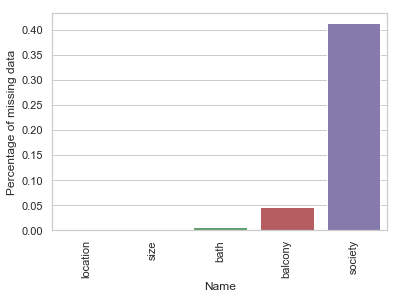

In [15]:
#visualising missing values
missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

#plot the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=missing_values)
plt.xticks(rotation = 90)
plt.ylabel('Percentage of missing data')
plt.show()

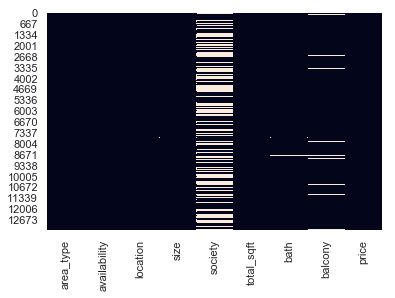

In [16]:
sns.heatmap(raw_data.isnull(), cbar=False)

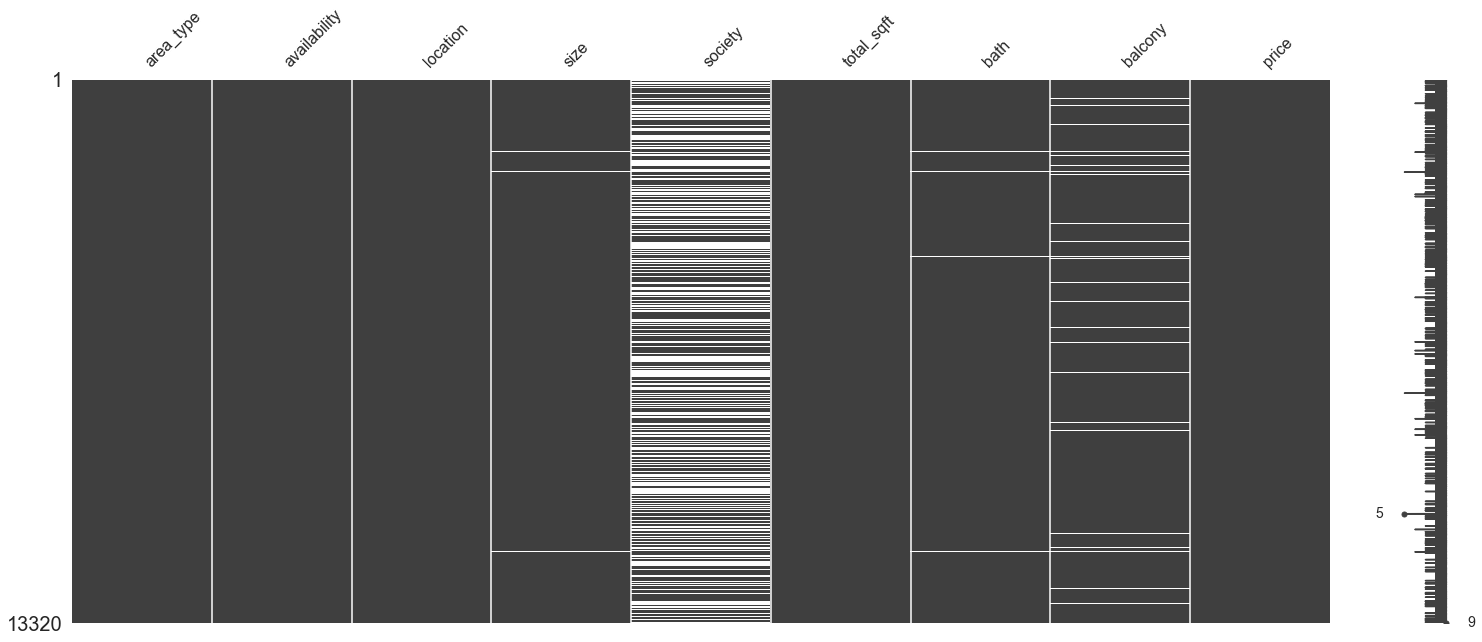

In [17]:
msno.matrix(raw_data)

Society column is filled with missing values with variation in occurrence
Blacony column has missing values with variation in occurrence
Size and bath columns have few missing values at the begining and end

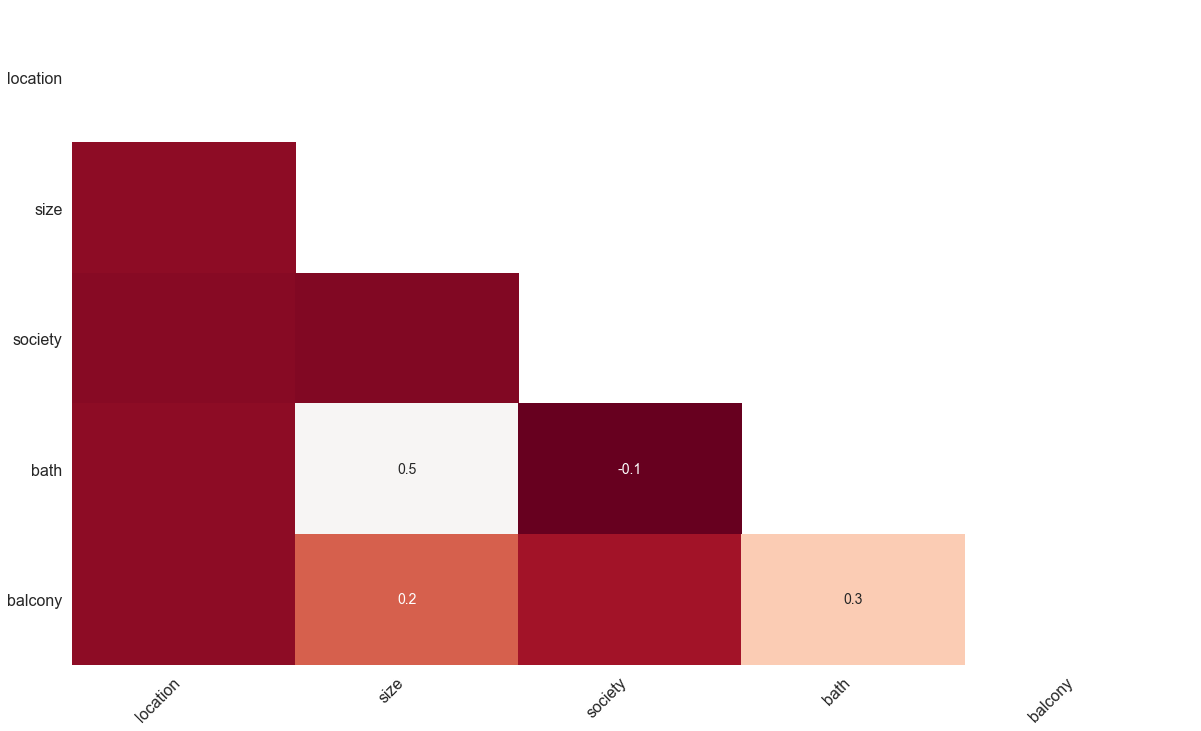

In [18]:
msno.heatmap(raw_data)

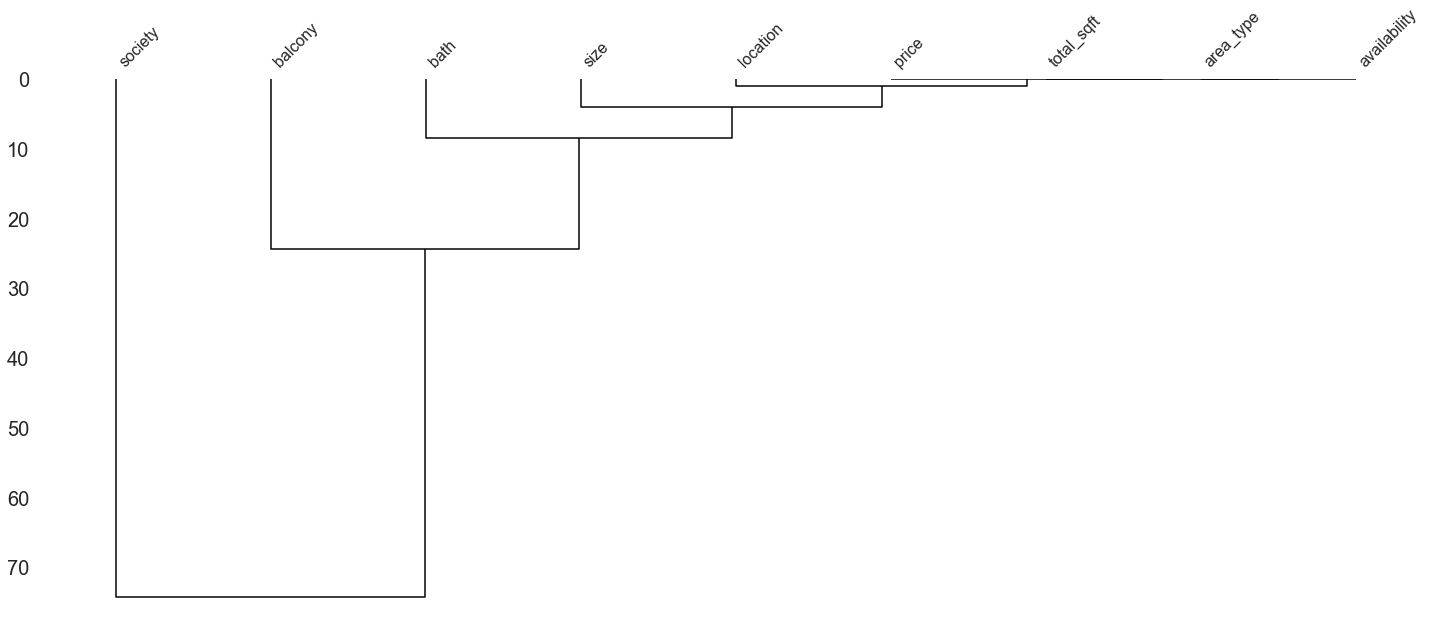

In [19]:
msno.dendrogram(raw_data)

### Handling missing values

##### Dropping all the columns with null values
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [20]:
raw_data.dropna(how='any', inplace=True)

In [21]:
raw_data_test.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


In [22]:
raw_data_test.drop('price',axis=1,inplace=True)

In [23]:
raw_data_test.dropna(how='any',inplace=True)

In [24]:
raw_data_test.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0
7,Built-up Area,Ready To Move,BEML Layout,2 BHK,G aceer,960,2.0,0.0


In [25]:
X=raw_data.drop('price',axis=1)
y=raw_data['price']

In [26]:
X.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
dtype: object

In [27]:
y.dtype

dtype('float64')

In [28]:
X1=raw_data.drop('price',axis=1)
y1=raw_data['price']

### Handling categorical columns

#### LabelEncoder

In [29]:
X.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0


In [30]:
le_X_0= preprocessing.LabelEncoder()
le_X_1= preprocessing.LabelEncoder()
le_X_2= preprocessing.LabelEncoder()
le_X_3= preprocessing.LabelEncoder()
le_X_4= preprocessing.LabelEncoder()

X['area_type'] = le_X_0.fit_transform(X['area_type'])
X['availability'] = le_X_1.fit_transform(X['availability'])
X['location'] = le_X_2.fit_transform(X['location'])
X['size'] = le_X_2.fit_transform(X['size'])
X['society'] = le_X_2.fit_transform(X['society'])
X['total_sqft'] = pd.to_numeric(X['total_sqft'], errors='coerce')

In [31]:
X.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony
0,3,35,210,3,443,1056.0,2.0,1.0
1,2,73,149,8,2353,2600.0,5.0,3.0
3,3,73,387,5,2109,1521.0,3.0,1.0
5,3,73,625,3,585,1170.0,2.0,1.0
11,2,73,625,8,1566,2785.0,5.0,3.0


In [32]:
X.dtypes

area_type         int64
availability      int64
location          int64
size              int64
society           int64
total_sqft      float64
bath            float64
balcony         float64
dtype: object

In [33]:
Xt=raw_data_test

In [34]:
Xt['area_type'] = le_X_0.fit_transform(Xt['area_type'])
Xt['availability'] = le_X_1.fit_transform(Xt['availability'])
Xt['location'] = le_X_2.fit_transform(Xt['location'])
Xt['size'] = le_X_2.fit_transform(Xt['size'])
Xt['society'] = le_X_2.fit_transform(Xt['society'])
Xt['total_sqft'] = pd.to_numeric(Xt['total_sqft'], errors='coerce')

In [35]:
Xt.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony
0,3,41,49,2,387,1225.0,2.0,2.0
2,2,6,104,6,422,1650.0,5.0,2.0
3,3,41,148,3,563,1322.0,3.0,1.0
4,3,41,153,2,25,1161.0,2.0,1.0
7,0,41,25,2,141,960.0,2.0,0.0


In [36]:
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X, y, test_size = 0.2, random_state = 0)

##### XGBoost Regression with labelencoding

In [37]:
regressor  = XGBRegressor()

In [38]:
regressor.fit(X_train_le, y_train_le)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [39]:
Y_pred_train_le = regressor.predict(X_train_le)

In [40]:
y_pred_le = regressor.predict(X_test_le)

In [41]:
def rmse(y_pred,y_test) :
    error = np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean() ** 0.5
    Acc = 1 - error
    return Acc

In [42]:
print("Accuracy attained on Training Set = ",rmse(Y_pred_train_le, y_train_le))
print("Accuracy attained on Test Set = ",rmse(y_pred_le,y_test_le))

Accuracy attained on Training Set =  0.8755858122867731
Accuracy attained on Test Set =  0.8698588644132921


In [43]:
y_pred_le_eval = regressor.predict(raw_data_test)

In [44]:
out_df = pd.DataFrame({'price': y_pred_le_eval})

In [45]:
out_df.to_excel('predictions_xgboost_le.xlsx', index=False)

Step1: Fixing lerning rate and number of estimators for tuning tree-based parameters

In [46]:
regressor1  = XGBRegressor(learning_rate=0.1,n_estimators=1000,max_depth=5,min_child_weight=1,
                          gamma=0,subsample=0.8,colsample_bytree=0.8,nthread=4,
                          objective='reg:linear',scale_pos_weight=1,seed=27)

In [47]:
regressor1.fit(X_train_le, y_train_le)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [48]:
Y_pred_train_le_1 = regressor.predict(X_train_le)

In [49]:
y_pred_le_1 = regressor.predict(X_test_le)

In [50]:
print("Accuracy attained on Training Set = ",rmse(Y_pred_train_le_1, y_train_le))
print("Accuracy attained on Test Set = ",rmse(y_pred_le_1,y_test_le))

Accuracy attained on Training Set =  0.8755858122867731
Accuracy attained on Test Set =  0.8698588644132921


In [51]:
y_pred_le_eval_1 = regressor1.predict(raw_data_test)

In [52]:
out_df = pd.DataFrame({'price': y_pred_le_eval_1})
out_df.to_excel('predictions_xgboost_le_tune.xlsx', index=False)

Step 2: Tune max_depath and min_child_weight

In [53]:
param_test1 = {
    'max_depth':list(range(3,10,2)),
    'min_child_weight':list(range(1,6,2))
}

gsearch1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1,n_estimators=1000,max_depth=5,min_child_weight=1,
                          gamma=0,subsample=0.8,colsample_bytree=0.8,nthread=4,
                          objective='reg:linear',scale_pos_weight=1,seed=27),
                         param_grid=param_test1,scoring='r2',n_jobs=4,iid=False,cv=5)

In [54]:
gsearch1.fit(X_train_le, y_train_le)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_depth': [3, 5, 7, 9], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [55]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.72075, std: 0.08404, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.69709, std: 0.09432, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.67937, std: 0.09050, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.71902, std: 0.08827, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.72402, std: 0.09738, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.69890, std: 0.10637, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.72706, std: 0.09379, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.71475, std: 0.10738, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.70245, std: 0.11089, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.73090, std: 0.09425, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.71581, std: 0.10316, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.69458, std: 0.10627, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 9, 'min_child_weight': 1

In [56]:
Y_pred_train_le_2 = gsearch1.best_estimator_.predict(X_train_le)

In [57]:
y_pred_le_2 = gsearch1.best_estimator_.predict(X_test_le)

In [58]:
print("Accuracy attained on Training Set = ",rmse(Y_pred_train_le_2, y_train_le))
print("Accuracy attained on Test Set = ",rmse(y_pred_le_2,y_test_le))

Accuracy attained on Training Set =  0.9821280542392018
Accuracy attained on Test Set =  0.8981895782032914


In [59]:
y_pred_le_eval_2 = gsearch1.best_estimator_.predict(raw_data_test)

In [60]:
out_df = pd.DataFrame({'price': y_pred_le_eval_2})
out_df.to_excel('predictions_xgboost_le_grid.xlsx', index=False)

#### Hashing

In [61]:
X1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0


In [62]:
ce_hash = ce.HashingEncoder(cols = ['area_type','availability','location','size','society'])
ce_data=ce_hash.fit_transform(X1, y1)

In [63]:
ce_data.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,total_sqft,bath,balcony
0,0,1,1,1,1,0,0,1,1056,2.0,1.0
1,2,1,2,0,0,0,0,0,2600,5.0,3.0
3,2,1,0,0,0,1,0,1,1521,3.0,1.0
5,3,0,0,0,1,0,0,1,1170,2.0,1.0
11,3,1,1,0,0,0,0,0,2785,5.0,3.0


In [64]:
ce_data.dtypes

col_0           int64
col_1           int64
col_2           int64
col_3           int64
col_4           int64
col_5           int64
col_6           int64
col_7           int64
total_sqft     object
bath          float64
balcony       float64
dtype: object

In [65]:
ce_data['total_sqft'] = pd.to_numeric(ce_data['total_sqft'], errors='coerce')

In [66]:
X_train_ha, X_test_ha, y_train_ha, y_test_ha = train_test_split(ce_data, y1, test_size = 0.2, random_state = 0)

##### XGBoost Regression with Hashing

In [67]:
regressor.fit(X_train_ha, y_train_ha)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [68]:
Y_pred_train_ha = regressor.predict(X_train_ha)

In [69]:
y_pred_ha = regressor.predict(X_test_ha)

In [70]:
print("Accuracy attained on Training Set = ",rmse(Y_pred_train_ha, y_train_ha))
print("Accuracy attained on Test Set = ",rmse(y_pred_ha,y_test_ha))

Accuracy attained on Training Set =  0.868713250582042
Accuracy attained on Test Set =  0.8648720563125601


#### One hot encoding

In [72]:
ce_one_hot = ce.OneHotEncoder(cols = ['area_type','availability','location','size','society'])

In [73]:
ce_one_hot_data=ce_one_hot.fit_transform(X, y)

In [74]:
ce_one_hot_data['total_sqft'] = pd.to_numeric(ce_one_hot_data['total_sqft'], errors='coerce')

In [75]:
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(ce_one_hot_data, y1, test_size = 0.2, random_state = 0)

##### XGBoost Regression with oneHot Encoding

In [76]:
regressor.fit(X_train_ohe, y_train_ohe)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [77]:
Y_pred_train_ohe = regressor.predict(X_train_ohe)

In [78]:
y_pred_ohe = regressor.predict(X_test_ohe)

In [79]:
print("Accuracy attained on Training Set = ",rmse(Y_pred_train_ohe, y_train_ohe))
print("Accuracy attained on Test Set = ",rmse(y_pred_ohe,y_test_ohe))

Accuracy attained on Training Set =  0.8691764010692318
Accuracy attained on Test Set =  0.8663414851270499
